In [189]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, BasicAer, execute
from qiskit.aqua.utils.circuit_factory import CircuitFactory
from utils.circuit_utils import cn_gate, multi_toffoli_q
from exp_a23 import A23Factory
from exp_a4 import A4Factory
from exp_a1 import A1Factory
import numpy as np
from qiskit import Aer
from qiskit.tools.visualization import plot_histogram, plot_state_city
from qiskit.providers.aer import QasmSimulator, StatevectorSimulator, UnitarySimulator
sv_simulator = Aer.get_backend('statevector_simulator')

In [100]:
# V
k = 1 # V degenerates into H if k=1
theta = 2 * np.arcsin(1.0/np.sqrt(k+1))

In [177]:
# # number of qubits n, where size of the matrix is 2**n
# n = 3
# t = 1
# # b entry of the matrices
# b_4 = 2
# b_2 = 3

# for test
n = 1
params=1

#quantum register for the matrix
qr = QuantumRegister(n+1)
#ancilla qubits
# qra = QuantumRegister(n-1)
cr = ClassicalRegister(2*n)
# qc = QuantumCircuit(qr, qra, cr)
qc = QuantumCircuit(qr, cr)

# TODO: substitute H by V
qc.ry(theta, qr[n])

# TODO: substitute by suitable exp(iH_jt)

#1 controlled H_1 (here is exp_a4)
# A4Factory(n).build_controlled(qc, qr, qr[n], qra, b_4*t)
# testing using H1=X
qc.cu3(-2*params, -np.pi/2, np.pi/2, qr[n], qr[0])

#0 controlled H_2 (here is exp_a23)
# qc.x(qr[n])
# A1Factory(n).build_controlled(qc, qr, qr[n], qra, b_2*t)
# qc.x(qr[n])
# testing using H2=Z
qc.x(qr[n])
qc.cu3(0, 0, np.pi/2, qr[n], qr[0])
qc.x(qr[n])

# TODO: substitute H by V^dagger
qc.ry(-theta, qr[n])
# qc.measure(qr[n], cr[0])

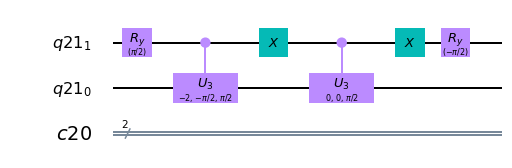

In [178]:
qc.draw(reverse_bits=True)

In [221]:
result = execute(qc, sv_simulator).result()
statevector = result.get_statevector(qc)
# circuit_statevector = np.empty((4,1))
# plot_state_city(statevector, title='State Vector')
for i in range(len(circuit_statevector)):
#     circuit_statevector[i] = statevector[i]
    print(statevector[i])
    

(0.77015115293407+0j)
0.4207354924039482j
(-0.22984884706593023+0j)
0.4207354924039483j


In [218]:
# def u3 matrix
def u_(theta, phi, lambda_):
    u = np.array([[np.cos(theta/2), -np.exp((1j)*(lambda_))*np.sin(theta/2)], 
                  [np.exp((1j)*(phi))*np.sin(theta/2), np.exp((1j)*(phi+lambda_))*np.cos(theta/2)]])
    return u

# create Hamiltonian of H1 and H2
h1 = u_(-2*params, -np.pi/2, np.pi/2)
h2 = u_(0, 0, np.pi/2)

# Total Hamiltonian
H = (k/(k+1)*h1+1/(k+1)*h2)

# initial state
ini_stat = np.array([[1], [0]])

# final state vector
exact_statevector = np.dot(H, ini_stat)
print(exact_statevector)

[[ 7.70151153e-01+0.j        ]
 [-2.57626187e-17+0.42073549j]]
